In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import datetime
import re

## Data Preparation

In [2]:
twitter_df_1 = pd.read_csv("tweet_df_v1_1.csv")
twitter_df_2 = pd.read_csv("tweet_df_v1_2.csv")

In [3]:
twitter_df_1.head()

,row,id,date,query,handle,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,Awww thats a bummer You shoulda got David Carr...
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his Facebook by t...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball Managed to sav...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i her...


In [4]:
twitter_df_1.tail()

,row,id,date,query,handle,tweet
816205,816205,1551363324,Sat Apr 18 08:51:38 PDT 2009,NO_QUERY,heybreyannaheyy,radiodisney HEEECK YEAH
816206,816206,1551363325,Sat Apr 18 08:51:36 PDT 2009,NO_QUERY,mylifeonaplate,I had a blast at my Bachelorette Party Watch o...
816207,816207,1551363360,Sat Apr 18 08:51:39 PDT 2009,NO_QUERY,biazinhahitz,Hey Sam How old was Dougie when he started pla...
816208,816208,1551363436,Sat Apr 18 08:51:38 PDT 2009,NO_QUERY,damana,hello again
816209,816209,1551363454,Sat Apr 18 08:51:38 PDT 2009,NO_QUERY,lilpea,im excited to see you tonight what time are yo...


In [5]:
twitter_df_2.head()

,row,id,date,query,handle,tweet
0,816210,1551363506,Sat Apr 18 08:51:40 PDT 2009,NO_QUERY,prosario_2000,I hope you are having a great day
1,816211,1551363569,Sat Apr 18 08:51:39 PDT 2009,NO_QUERY,Chelsea_Volturi,Nope Just Bored Well Say That Most Of The Time...
2,816212,1551363682,Sat Apr 18 08:51:41 PDT 2009,NO_QUERY,askbillmitchell,Sometimes and just a little cryptic LOL I am j...
3,816213,1551363752,Sat Apr 18 08:51:41 PDT 2009,NO_QUERY,kendiixd,so i guesss im not in coolifornia anymore how ...
4,816214,1551363844,Sat Apr 18 08:51:42 PDT 2009,NO_QUERY,ladycalypso,I do that too but right now its the Radiant Da...


In [6]:
twitter_df_2.tail()

,row,id,date,query,handle,tweet
783785,1599995,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up Having no school is the best feel...
783786,1599996,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDBcom Very cool to hear old Walt interview...
783787,1599997,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover Ask me fo...
783788,1599998,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time Tup...
783789,1599999,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy charitytuesday


In [7]:
twitter_df = pd.concat([twitter_df_1, twitter_df_1])

In [8]:
twitter_df.head()

,row,id,date,query,handle,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,Awww thats a bummer You shoulda got David Carr...
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his Facebook by t...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball Managed to sav...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i her...


In [9]:
twitter_df.tail()

,row,id,date,query,handle,tweet
816205,816205,1551363324,Sat Apr 18 08:51:38 PDT 2009,NO_QUERY,heybreyannaheyy,radiodisney HEEECK YEAH
816206,816206,1551363325,Sat Apr 18 08:51:36 PDT 2009,NO_QUERY,mylifeonaplate,I had a blast at my Bachelorette Party Watch o...
816207,816207,1551363360,Sat Apr 18 08:51:39 PDT 2009,NO_QUERY,biazinhahitz,Hey Sam How old was Dougie when he started pla...
816208,816208,1551363436,Sat Apr 18 08:51:38 PDT 2009,NO_QUERY,damana,hello again
816209,816209,1551363454,Sat Apr 18 08:51:38 PDT 2009,NO_QUERY,lilpea,im excited to see you tonight what time are yo...


In [10]:
print(twitter_df.shape)

(1632420, 6)


In [11]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1632420 entries, 0 to 816209
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   row     1632420 non-null  int64 
 1   id      1632420 non-null  int64 
 2   date    1632420 non-null  object
 3   query   1632420 non-null  object
 4   handle  1632420 non-null  object
 5   tweet   1629024 non-null  object
dtypes: int64(2), object(4)
memory usage: 87.2+ MB


In [12]:
twitter_df = twitter_df.reset_index()
twitter_df.head()

,index,row,id,date,query,handle,tweet
0,0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,Awww thats a bummer You shoulda got David Carr...
1,1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his Facebook by t...
2,2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball Managed to sav...
3,3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i her...


In [13]:
twitter_df = twitter_df[['date','tweet']]
twitter_df.head()

,date,tweet
0,Mon Apr 06 22:19:45 PDT 2009,Awww thats a bummer You shoulda got David Carr...
1,Mon Apr 06 22:19:49 PDT 2009,is upset that he cant update his Facebook by t...
2,Mon Apr 06 22:19:53 PDT 2009,I dived many times for the ball Managed to sav...
3,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,Mon Apr 06 22:19:57 PDT 2009,no its not behaving at all im mad why am i her...


In [14]:
twitter_df['date'] = pd.to_datetime(twitter_df['date'])
twitter_df.head()

,date,tweet
0,2009-04-06 22:19:45,Awww thats a bummer You shoulda got David Carr...
1,2009-04-06 22:19:49,is upset that he cant update his Facebook by t...
2,2009-04-06 22:19:53,I dived many times for the ball Managed to sav...
3,2009-04-06 22:19:57,my whole body feels itchy and like its on fire
4,2009-04-06 22:19:57,no its not behaving at all im mad why am i her...


In [15]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632420 entries, 0 to 1632419
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   date    1632420 non-null  datetime64[ns]
 1   tweet   1629024 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 24.9+ MB


In [16]:
# functions to apply to tweets
def polarity_score(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return - 1

def polarity_word(x):
    if (x < 0):
        return "negative"
    elif (x == 0):
        return "neutral"
    else:
        return "positive"
    
def subjectivity_word(x):
    if (x < 0.6 and x >0.4):
        return "subjective"
    else:
        return "objective"
    
def vader_score(x):
    if x > 0.05:
        return 1
    elif x < -0.05:
        return -1
    else:
        return 0

def vader_word(x):
    if (x < 0):
        return "negative"
    elif (x == 0):
        return "neutral"
    else:
        return "positive"

In [17]:
twitter_df.tweet[0]

'Awww thats a bummer You shoulda got David Carr of Third Day to do it D'

In [18]:
twitter_df.loc[0][1]

'Awww thats a bummer You shoulda got David Carr of Third Day to do it D'

In [19]:
from textblob import TextBlob

In [20]:
#pip install textblob

In [28]:
import nltk

In [29]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\benmc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
from nltk.stem import WordNetLemmatizer

In [31]:
twitter_df.head()

,date,tweet
0,2009-04-06 22:19:45,Awww thats a bummer You shoulda got David Carr...
1,2009-04-06 22:19:49,is upset that he cant update his Facebook by t...
2,2009-04-06 22:19:53,I dived many times for the ball Managed to sav...
3,2009-04-06 22:19:57,my whole body feels itchy and like its on fire
4,2009-04-06 22:19:57,no its not behaving at all im mad why am i her...


In [32]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632420 entries, 0 to 1632419
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   date    1632420 non-null  datetime64[ns]
 1   tweet   1632420 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 24.9+ MB


In [33]:
twitter_df["tweet"] = twitter_df["tweet"].astype(str)

In [34]:
lemmatizer = WordNetLemmatizer()

In [35]:
twitter_df['lemmatizer'] = twitter_df['tweet'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [40]:
from datetime import datetime,date

In [41]:
d = datetime.now()

In [42]:
twitter_df['date'] = [d.date() for d in twitter_df["date"]]
twitter_df

AttributeError: 'datetime.date' object has no attribute 'date'

In [46]:
twitter_df = twitter_df.sort_values(by='date')

In [47]:
twitter_df

,date,tweet,lemmatizer
0,2009-04-06,Awww thats a bummer You shoulda got David Carr...,Awww thats a bummer You shoulda got David Carr...
1616382,2009-04-06,correction i GOT a badass fringe,correction i GOT a badass fringe
1616381,2009-04-06,but you did go to hash bash anyway,but you did go to hash bash anyway
1616380,2009-04-06,Feels pretty good doesnt it,Feels pretty good doesnt it
1616379,2009-04-06,Callin it a night I always have the best sleep...,Callin it a night I always have the best sleep...
...,...,...,...
1606161,2009-06-25,getting ready for work fun times,getting ready for work fun time
1606162,2009-06-25,hey garskin gue mngk nympe2,hey garskin gue mngk nympe2
1606163,2009-06-25,school in a bitim sooo tired and wanna go back...,school in a bitim sooo tired and wanna go back...
1606156,2009-06-25,Today is cleaning day for me,Today is cleaning day for me


In [50]:
date_counts = twitter_df['date'].value_counts()
date_counts_sorted = date_counts.sort_index()
date_counts_sorted

date
2009-04-06     6720
2009-04-07    34622
2009-04-17     6168
2009-04-18    22628
2009-04-19    22854
2009-04-20    15634
2009-04-21     7008
2009-05-01     6508
2009-05-02    22796
2009-05-03    29558
2009-05-04    12876
2009-05-09     9994
2009-05-10    21404
2009-05-11     3530
2009-05-13     3552
2009-05-14    14616
2009-05-16     7676
2009-05-17    28578
2009-05-18    26716
2009-05-21     1576
2009-05-22    27894
2009-05-23      148
2009-05-25      142
2009-05-26     8714
2009-05-27      734
2009-05-28    12372
2009-05-29    58902
2009-05-30    78558
2009-05-31    72800
2009-06-01    88594
2009-06-02    50846
2009-06-03    32038
2009-06-04     6304
2009-06-05    47136
2009-06-06    87488
2009-06-07    76336
2009-06-14     6692
2009-06-15    90716
2009-06-16    87232
2009-06-17    88024
2009-06-18    86008
2009-06-19    86272
2009-06-20    90728
2009-06-21    32720
2009-06-22    24018
2009-06-23    34004
2009-06-24    12598
2009-06-25    39388
Name: count, dtype: int64

In [54]:
date_counts_sorted.values

array([ 6720, 34622,  6168, 22628, 22854, 15634,  7008,  6508, 22796,
       29558, 12876,  9994, 21404,  3530,  3552, 14616,  7676, 28578,
       26716,  1576, 27894,   148,   142,  8714,   734, 12372, 58902,
       78558, 72800, 88594, 50846, 32038,  6304, 47136, 87488, 76336,
        6692, 90716, 87232, 88024, 86008, 86272, 90728, 32720, 24018,
       34004, 12598, 39388], dtype=int64)

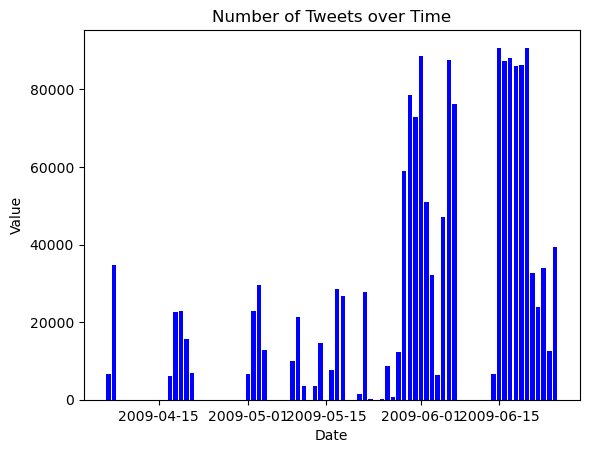

In [55]:
plt.bar(date_counts_sorted.index, date_counts_sorted.values, color = "blue")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Number of Tweets over Time")
plt.show()

In [71]:
twitter_df["character_count"] = twitter_df["tweet"].apply(len)

In [67]:
import seaborn as sns

Text(0.5, 1.0, 'Character Count Distribution')

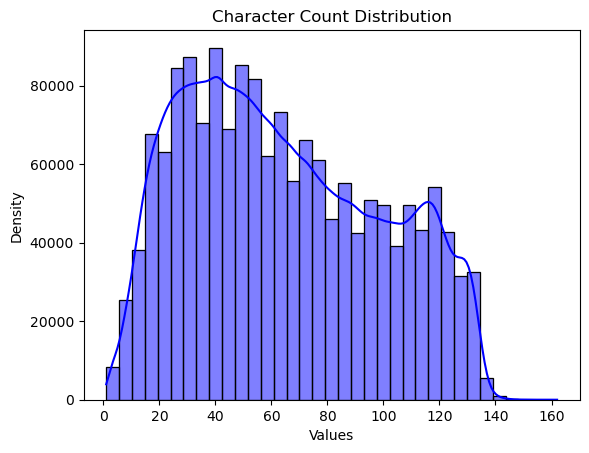

In [72]:
sns.histplot(twitter_df["character_count"], kde=True, bins=35, color='blue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Character Count Distribution')

### Sentiment Analysis

In [73]:
def calculate_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [74]:
twitter_df["polarity_scores"] = twitter_df["tweet"].apply(calculate_polarity)

In [75]:
twitter_df['polarity_scores'] = twitter_df['lemmatizer'].map(lambda text: TextBlob(text).sentiment.polarity)

In [76]:
twitter_df

,date,tweet,lemmatizer,character_count,trans_character_count,polarity_scores
0,2009-04-06,Awww thats a bummer You shoulda got David Carr...,Awww thats a bummer You shoulda got David Carr...,70,70,0.200
1616382,2009-04-06,correction i GOT a badass fringe,correction i GOT a badass fringe,32,32,0.000
1616381,2009-04-06,but you did go to hash bash anyway,but you did go to hash bash anyway,34,34,0.000
1616380,2009-04-06,Feels pretty good doesnt it,Feels pretty good doesnt it,27,27,0.475
1616379,2009-04-06,Callin it a night I always have the best sleep...,Callin it a night I always have the best sleep...,67,67,0.850
...,...,...,...,...,...,...
1606161,2009-06-25,getting ready for work fun times,getting ready for work fun time,32,31,0.250
1606162,2009-06-25,hey garskin gue mngk nympe2,hey garskin gue mngk nympe2,27,27,0.000
1606163,2009-06-25,school in a bitim sooo tired and wanna go back...,school in a bitim sooo tired and wanna go back...,84,84,-0.200
1606156,2009-06-25,Today is cleaning day for me,Today is cleaning day for me,28,28,0.000


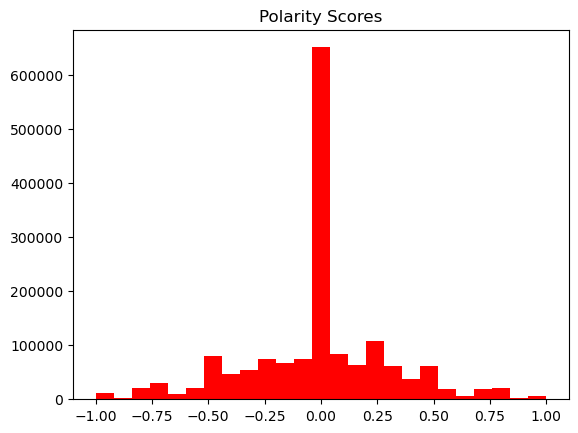

In [77]:
plt.hist(twitter_df['polarity_scores'], bins = 25, color = "red")
plt.title('Polarity Scores')
plt.show()

In [78]:
twitter_df['polarity_scores_int'] = twitter_df['polarity_scores'].apply(func = polarity_score)
twitter_df['polarity_word'] = twitter_df['polarity_scores_int'].apply(func = polarity_word)

In [79]:
twitter_df.head()

,date,tweet,lemmatizer,character_count,trans_character_count,polarity_scores,polarity_scores_int,polarity_word
0,2009-04-06,Awww thats a bummer You shoulda got David Carr...,Awww thats a bummer You shoulda got David Carr...,70,70,0.200,1,positive
1616382,2009-04-06,correction i GOT a badass fringe,correction i GOT a badass fringe,32,32,0.000,0,neutral
1616381,2009-04-06,but you did go to hash bash anyway,but you did go to hash bash anyway,34,34,0.000,0,neutral
1616380,2009-04-06,Feels pretty good doesnt it,Feels pretty good doesnt it,27,27,0.475,1,positive
1616379,2009-04-06,Callin it a night I always have the best sleep...,Callin it a night I always have the best sleep...,67,67,0.850,1,positive


In [80]:
import seaborn as sns

<Axes: xlabel='polarity_word', ylabel='count'>

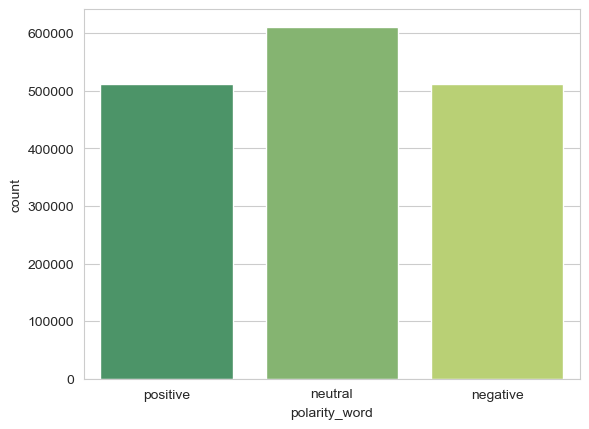

In [81]:
sns.set_style('whitegrid')
sns.countplot(x='polarity_word',data=twitter_df, palette='summer')

In [82]:
def calculate_subjectivity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.subjectivity

In [85]:
twitter_df["subjectivity_scores"] = twitter_df["lemmatizer"].apply(calculate_subjectivity)

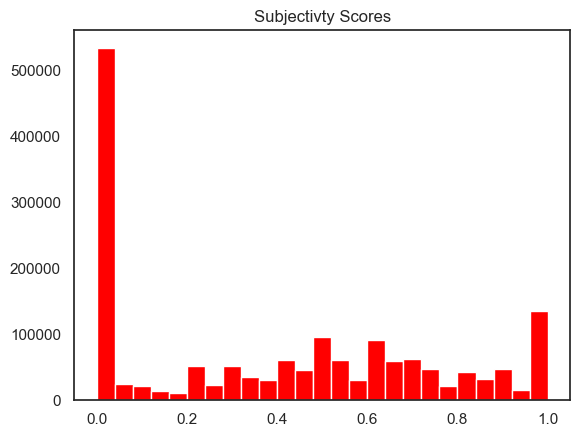

In [98]:
sns.set(style='white')
plt.hist(twitter_df['subjectivity_scores'], bins = 25, color = "red")
plt.title('Subjectivty Scores')
plt.show()

In [87]:
#pip install vaderSentiment

In [88]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [89]:
analyzer = SentimentIntensityAnalyzer()
vader_scores = twitter_df['lemmatizer'].apply(analyzer.polarity_scores)
vader = []
for i in vader_scores:
    vader.append(i['compound'])
twitter_df['vader_scores'] = vader

In [90]:
twitter_df

,date,tweet,lemmatizer,character_count,trans_character_count,polarity_scores,polarity_scores_int,polarity_word,subjectivity_scores,vader_scores
0,2009-04-06,Awww thats a bummer You shoulda got David Carr...,Awww thats a bummer You shoulda got David Carr...,70,70,0.200,1,positive,0.45,-0.3818
1616382,2009-04-06,correction i GOT a badass fringe,correction i GOT a badass fringe,32,32,0.000,0,neutral,0.00,0.3400
1616381,2009-04-06,but you did go to hash bash anyway,but you did go to hash bash anyway,34,34,0.000,0,neutral,0.00,0.0000
1616380,2009-04-06,Feels pretty good doesnt it,Feels pretty good doesnt it,27,27,0.475,1,positive,0.80,0.7269
1616379,2009-04-06,Callin it a night I always have the best sleep...,Callin it a night I always have the best sleep...,67,67,0.850,1,positive,0.45,0.7964
...,...,...,...,...,...,...,...,...,...,...
1606161,2009-06-25,getting ready for work fun times,getting ready for work fun time,32,31,0.250,1,positive,0.35,0.7003
1606162,2009-06-25,hey garskin gue mngk nympe2,hey garskin gue mngk nympe2,27,27,0.000,0,neutral,0.00,0.0000
1606163,2009-06-25,school in a bitim sooo tired and wanna go back...,school in a bitim sooo tired and wanna go back...,84,84,-0.200,-1,negative,0.35,-0.2382
1606156,2009-06-25,Today is cleaning day for me,Today is cleaning day for me,28,28,0.000,0,neutral,0.00,0.0000


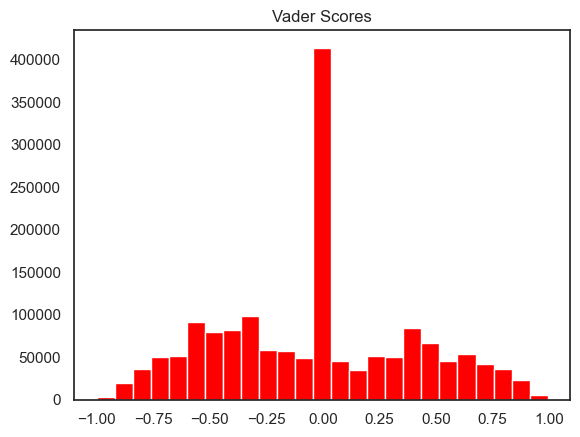

In [99]:
plt.hist(twitter_df['vader_scores'], bins = 25, color = "red")
plt.title('Vader Scores')
plt.show()

In [92]:
# aggregating the scores for each date in the dataset by computing the average
polarity_df = twitter_df.groupby('date')['polarity_scores'].mean().reset_index()
subjectivity_df = twitter_df.groupby('date')['subjectivity_scores'].mean().reset_index()
vader_df = twitter_df.groupby('date')['vader_scores'].mean().reset_index()

In [101]:
data = {
    'date': polarity_df['date'],
    'polarity_scores': polarity_df['polarity_scores'],
    'subjectivity_scores': subjectivity_df['subjectivity_scores'],
    'vader_scores': vader_df['vader_scores']
}

ts_df = pd.DataFrame(data)
ts_df

,date,polarity_scores,subjectivity_scores,vader_scores
0,2009-04-06,0.094961,0.409290,0.147343
1,2009-04-07,0.099100,0.401130,0.162493
2,2009-04-17,0.120122,0.410242,0.198122
3,2009-04-18,0.034408,0.396451,0.046762
4,2009-04-19,-0.006202,0.378777,-0.020330
5,2009-04-20,-0.011622,0.385611,-0.036186
6,2009-04-21,-0.003289,0.393079,-0.029846
7,2009-05-01,-0.010592,0.405134,-0.045176
8,2009-05-02,-0.007667,0.393371,-0.028857
9,2009-05-03,-0.010416,0.394671,-0.035131


In [102]:
ts_df['date'] = pd.to_datetime(ts_df['date'], format="%Y-%m-%d")

In [103]:
ts_df.set_index('date', inplace=True)

In [104]:
ts_df.index

DatetimeIndex(['2009-04-06', '2009-04-07', '2009-04-17', '2009-04-18',
               '2009-04-19', '2009-04-20', '2009-04-21', '2009-05-01',
               '2009-05-02', '2009-05-03', '2009-05-04', '2009-05-09',
               '2009-05-10', '2009-05-11', '2009-05-13', '2009-05-14',
               '2009-05-16', '2009-05-17', '2009-05-18', '2009-05-21',
               '2009-05-22', '2009-05-23', '2009-05-25', '2009-05-26',
               '2009-05-27', '2009-05-28', '2009-05-29', '2009-05-30',
               '2009-05-31', '2009-06-01', '2009-06-02', '2009-06-03',
               '2009-06-04', '2009-06-05', '2009-06-06', '2009-06-07',
               '2009-06-14', '2009-06-15', '2009-06-16', '2009-06-17',
               '2009-06-18', '2009-06-19', '2009-06-20', '2009-06-21',
               '2009-06-22', '2009-06-23', '2009-06-24', '2009-06-25'],
              dtype='datetime64[ns]', name='date', freq=None)

In [105]:
ts_df = ts_df.resample('D').ffill().reset_index()

In [106]:
ts_df

,date,polarity_scores,subjectivity_scores,vader_scores
0,2009-04-06,0.094961,0.409290,0.147343
1,2009-04-07,0.099100,0.401130,0.162493
2,2009-04-08,0.099100,0.401130,0.162493
3,2009-04-09,0.099100,0.401130,0.162493
4,2009-04-10,0.099100,0.401130,0.162493
...,...,...,...,...
76,2009-06-21,-0.000478,0.400266,-0.022298
77,2009-06-22,-0.024853,0.407731,-0.061300
78,2009-06-23,-0.020091,0.405474,-0.048686
79,2009-06-24,-0.015868,0.398273,-0.043578


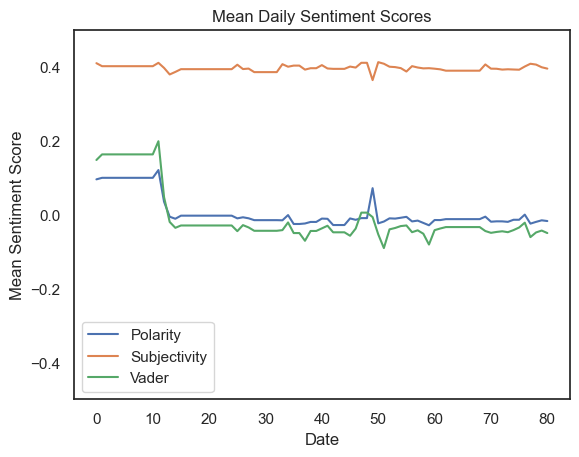

In [107]:
plt.plot(ts_df['polarity_scores'],label='Polarity')
plt.plot(ts_df['subjectivity_scores'],label="Subjectivity")
plt.plot(ts_df['vader_scores'],label='Vader')
plt.title("Mean Daily Sentiment Scores")
plt.xlabel("Date")
plt.ylabel("Mean Sentiment Score")
plt.legend()
ax = plt.gca()
ax.set_ylim([-0.5, 0.5])
plt.show()

### Forecasting

In [108]:
#pip install skforecast

In [109]:
# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
#from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

In [110]:
data_train = ts_df[0:int(len(ts_df)*.8)]

Train dates : 2009-04-06 00:00:00 --- 2009-06-08 00:00:00  (n=64)
Test dates  : 2009-06-09 00:00:00 --- 2009-06-25 00:00:00  (n=17)


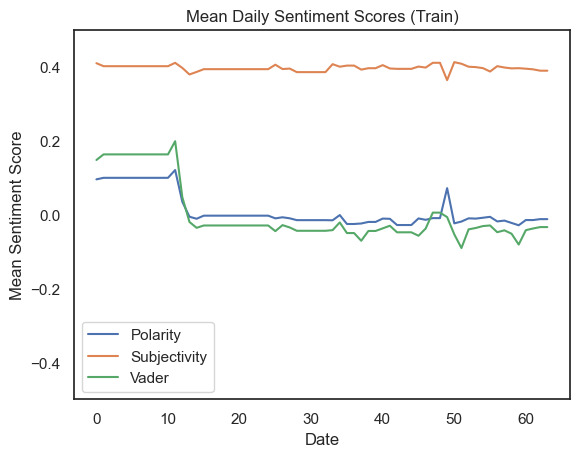

In [111]:
# Split data into train-test

data_train = ts_df[0:int(len(ts_df)*.8)]
data_test  = ts_df[int(len(ts_df)*.8):]

print(f"Train dates : {data_train['date'][0]} --- {data_train['date'][len(data_train) - 1]}  (n={len(data_train)})")
print(f"Test dates  : {data_test['date'][int(len(ts_df)*.8)]} --- {data_test['date'][len(ts_df) - 1]}  (n={len(data_test)})")

plt.plot(data_train['polarity_scores'],label='Polarity')
plt.plot(data_train['subjectivity_scores'],label="Subjectivity")
plt.plot(data_train['vader_scores'],label='Vader')
plt.title("Mean Daily Sentiment Scores (Train)")
plt.xlabel("Date")
plt.ylabel("Mean Sentiment Score")
plt.legend()
ax = plt.gca()
ax.set_ylim([-0.5, 0.5])
plt.show()

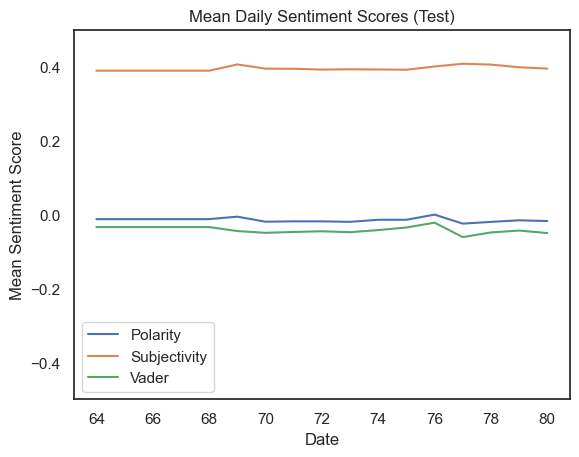

In [112]:
plt.plot(data_test['polarity_scores'],label='Polarity')
plt.plot(data_test['subjectivity_scores'],label="Subjectivity")
plt.plot(data_test['vader_scores'],label='Vader')
plt.title("Mean Daily Sentiment Scores (Test)")
plt.xlabel("Date")
plt.ylabel("Mean Sentiment Score")
plt.legend()
ax = plt.gca()
ax.set_ylim([-0.5, 0.5])
plt.show()

### ForecasterAutoreg Polarity

#### Model Build

In [113]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 7
                )

forecaster.fit(y=data_train['polarity_scores'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 63] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-11-08 23:40:59 
Last fit date: 2023-11-08 23:40:59 
Skforecast version: 0.10.1 
Python version: 3.11.5 
Forecaster id: None 

In [114]:
# Predictions
# ==============================================================================
steps = 17
predictions = forecaster.predict(steps=steps)
predictions.head(5)

64   -0.004272
65   -0.011965
66   -0.005762
67   -0.017874
68   -0.019675
Name: pred, dtype: float64

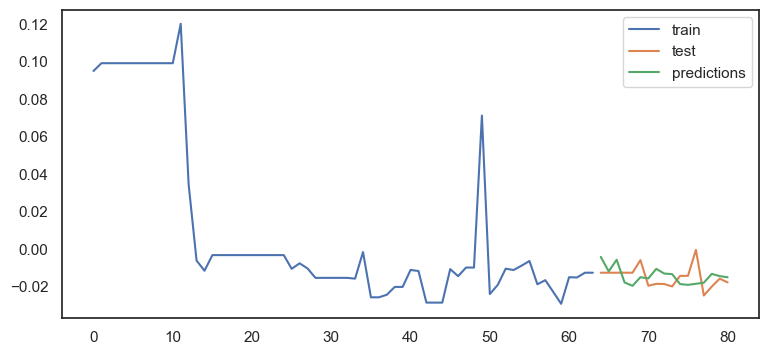

In [115]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['polarity_scores'].plot(ax=ax, label='train')
data_test['polarity_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [116]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['polarity_scores'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 5.320433840060729e-05


In [117]:
# Hyperparameter Grid search
# ==============================================================================
steps = 17
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['polarity_scores'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 3, 'n_estimators': 500}
  Backtesting metric: 0.00033179981907190744



In [118]:
# Grid Search results
# ==============================================================================
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",0.000332,3,500
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",0.000332,10,100
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",0.000332,5,100
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",0.000332,3,100
11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 500}",0.000332,10,500
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",0.000332,5,500
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",0.000335,3,500
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",0.000337,3,100
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",0.000342,10,500
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",0.000342,10,100


In [119]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=data_train['polarity_scores'])

In [120]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

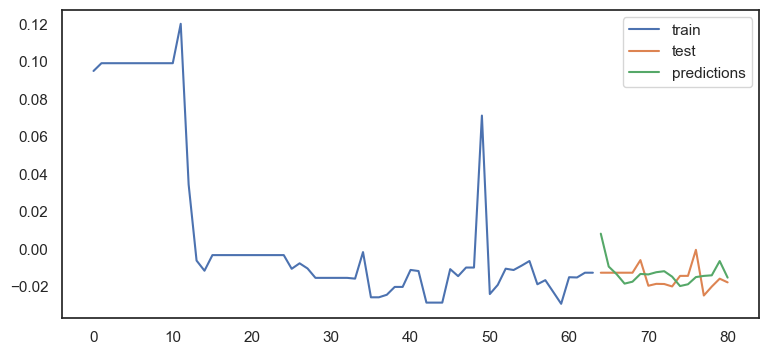

In [121]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['polarity_scores'].plot(ax=ax, label='train')
data_test['polarity_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [122]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['polarity_scores'],
                y_pred = predictions
                )

print(f"Test error (mse): {error_mse}")

Test error (mse): 7.099470994899647e-05


In [ ]:
forecaster.get_feature_importance()

#### 1-Week Forecast

In [131]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=ts_df['polarity_scores'])

In [132]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=7)

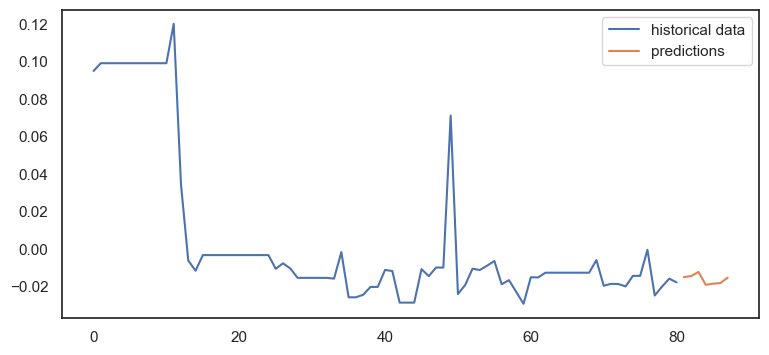

In [133]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
ts_df['polarity_scores'].plot(ax=ax, label='historical data')
predictions.plot(ax=ax, label='predictions')
ax.legend();

#### 1-Month Forecast

In [136]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=ts_df['polarity_scores'])

In [137]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=30)

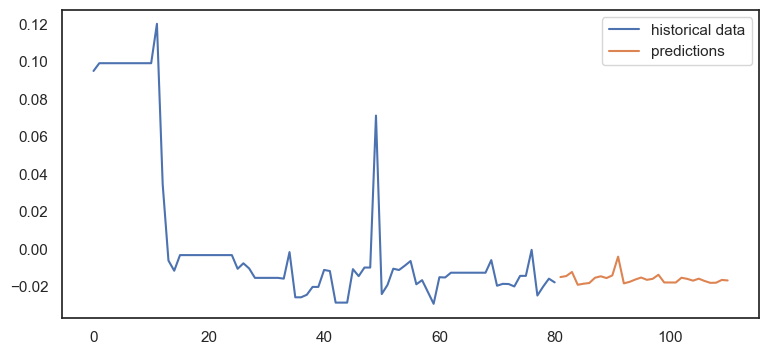

In [138]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
ts_df['polarity_scores'].plot(ax=ax, label='historical data')
predictions.plot(ax=ax, label='predictions')
ax.legend();

#### 3-Month Forecast

In [139]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=ts_df['polarity_scores'])

In [140]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=90)

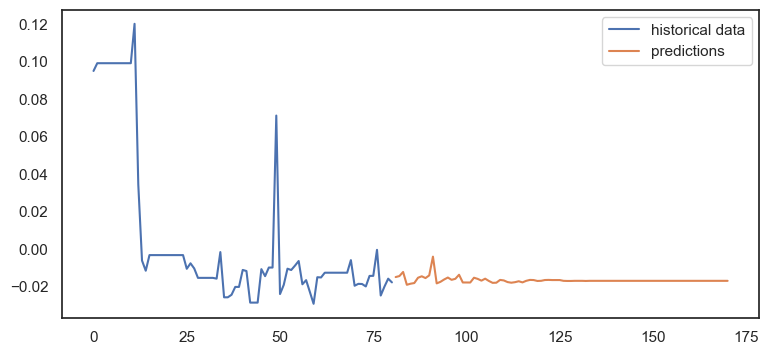

In [141]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
ts_df['polarity_scores'].plot(ax=ax, label='historical data')
predictions.plot(ax=ax, label='predictions')
ax.legend();

### ForecasterAutoreg Subjectivity

### Model Build

In [142]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=12356),
                lags = 7
                )

forecaster.fit(y=data_train['subjectivity_scores'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=12356) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 63] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 12356, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-11-08 23:47:14 
Last fit date: 2023-11-08 23:47:14 
Skforecast version: 0.10.1 
Python version: 3.11.5 
Forecaster id: None 

In [143]:
steps = 17
predictions = forecaster.predict(steps=steps)
predictions.head(5)

64    0.392293
65    0.392809
66    0.393892
67    0.395991
68    0.394071
Name: pred, dtype: float64

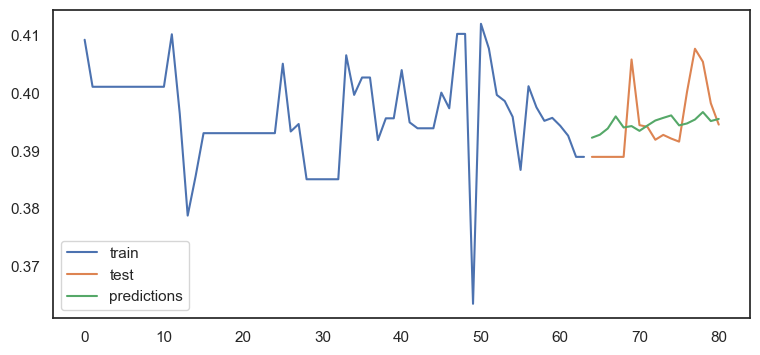

In [144]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['subjectivity_scores'].plot(ax=ax, label='train')
data_test['subjectivity_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [145]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['subjectivity_scores'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 3.365408406293744e-05


In [146]:
# Hyperparameter Grid search
# ==============================================================================
steps = 17
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=12356),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['subjectivity_scores'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 3, 'n_estimators': 100}
  Backtesting metric: 0.00010847930578586045



In [147]:
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",0.000108,3,100
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",0.000112,3,500
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",0.000114,5,100
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",0.000120,10,100
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",0.000126,10,500
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",0.000127,5,500
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",0.000142,3,100
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",0.000144,3,500
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",0.000144,5,100
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",0.000144,10,100


### Final model

In [148]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=12356)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=data_train['subjectivity_scores'])

In [149]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

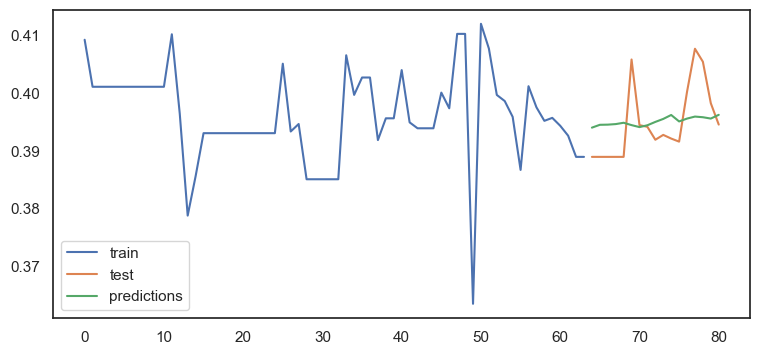

In [150]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['subjectivity_scores'].plot(ax=ax, label='train')
data_test['subjectivity_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [151]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['subjectivity_scores'],
                y_pred = predictions
                )

print(f"Test error (mse): {error_mse}")

Test error (mse): 3.496829701295722e-05


In [ ]:
forecaster.get_feature_importance()

### Forecast

#### 1-Week Forecast

In [152]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=ts_df['subjectivity_scores'])

In [153]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=7)

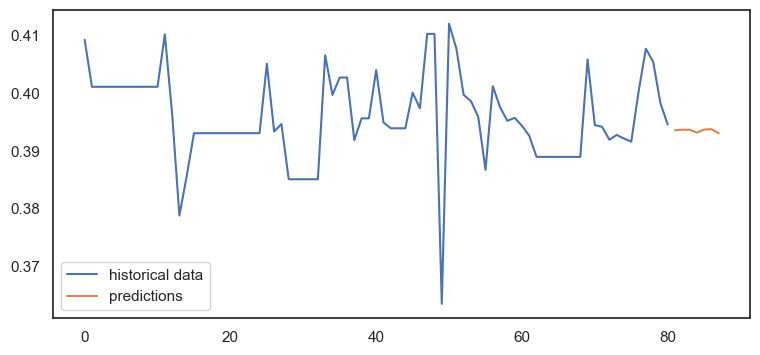

In [154]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
ts_df['subjectivity_scores'].plot(ax=ax, label='historical data')
predictions.plot(ax=ax, label='predictions')
ax.legend();

#### 1-Month Forecast

In [155]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=ts_df['subjectivity_scores'])

In [156]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=30)

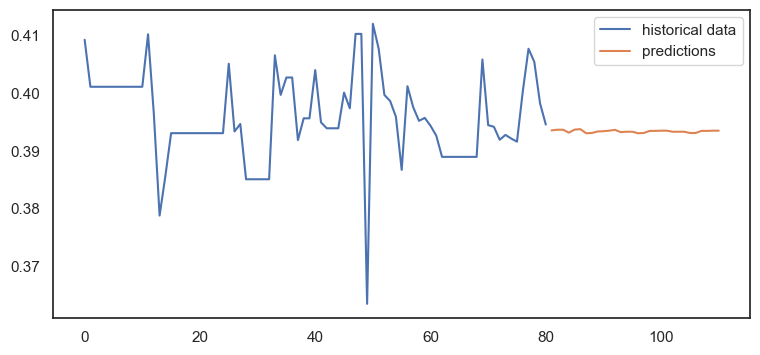

In [157]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
ts_df['subjectivity_scores'].plot(ax=ax, label='historical data')
predictions.plot(ax=ax, label='predictions')
ax.legend();

#### 3-Month Forecast

In [158]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=ts_df['subjectivity_scores'])

In [159]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=90)

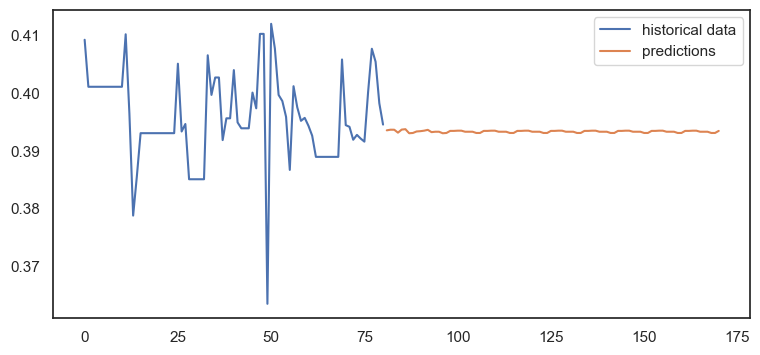

In [160]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
ts_df['subjectivity_scores'].plot(ax=ax, label='historical data')
predictions.plot(ax=ax, label='predictions')
ax.legend();

### ForecasterAutoreg Vader

### Model Build

In [161]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=4567),
                lags = 7
                )

forecaster.fit(y=data_train['vader_scores'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=4567) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 63] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 4567, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-11-08 23:49:50 
Last fit date: 2023-11-08 23:49:51 
Skforecast version: 0.10.1 
Python version: 3.11.5 
Forecaster id: None 

In [162]:
steps = 17
predictions = forecaster.predict(steps=steps)
predictions.head(5)

64   -0.044162
65   -0.046658
66   -0.047359
67   -0.045447
68   -0.039635
Name: pred, dtype: float64

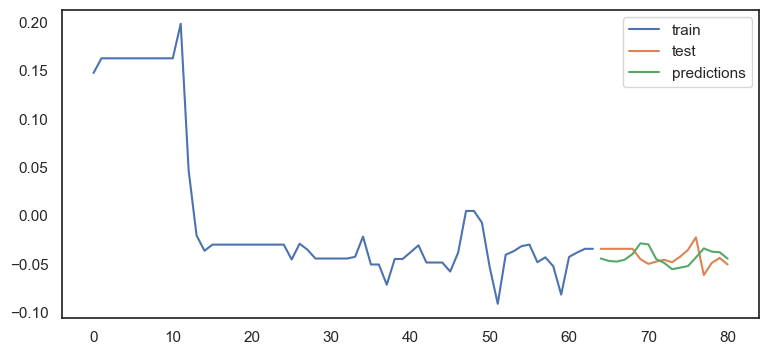

In [163]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['vader_scores'].plot(ax=ax, label='train')
data_test['vader_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [164]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['vader_scores'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 0.00018430864616540498


In [165]:
# Hyperparameter Grid search
# ==============================================================================
steps = 17
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=4567),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['vader_scores'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 3, 'n_estimators': 500}
  Backtesting metric: 0.0003361697181951018



In [166]:
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",0.000336,3,500
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",0.000338,5,500
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",0.000342,10,500
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",0.000343,3,100
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",0.000378,10,100
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",0.000379,5,100
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",0.000425,3,100
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",0.000445,3,500
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",0.000446,10,100
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",0.000449,5,100


In [167]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=4567)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=data_train['vader_scores'])

In [168]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

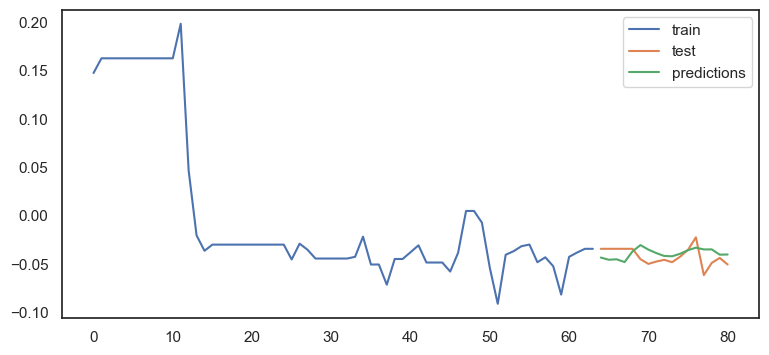

In [169]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['vader_scores'].plot(ax=ax, label='train')
data_test['vader_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [170]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['vader_scores'],
                y_pred = predictions
                )

print(f"Test error (mse): {error_mse}")

Test error (mse): 0.00013039503925619056


In [ ]:
forecaster.get_feature_importance()

### Forecast

#### 1-Week Forecast

In [171]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=ts_df['vader_scores'])

In [172]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=7)

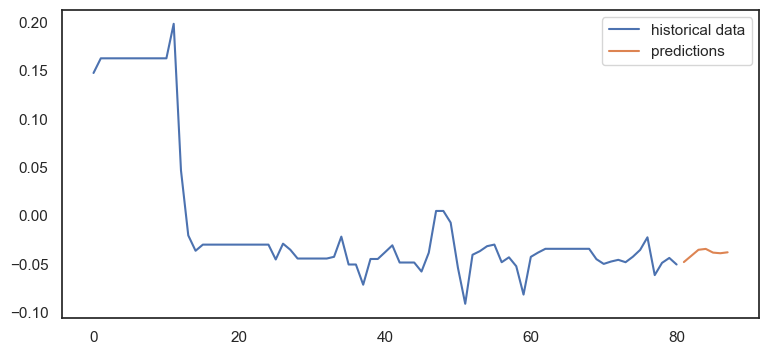

In [173]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
ts_df['vader_scores'].plot(ax=ax, label='historical data')
predictions.plot(ax=ax, label='predictions')
ax.legend();

#### 1-Month Forecast

In [174]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=ts_df['vader_scores'])

In [175]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=30)

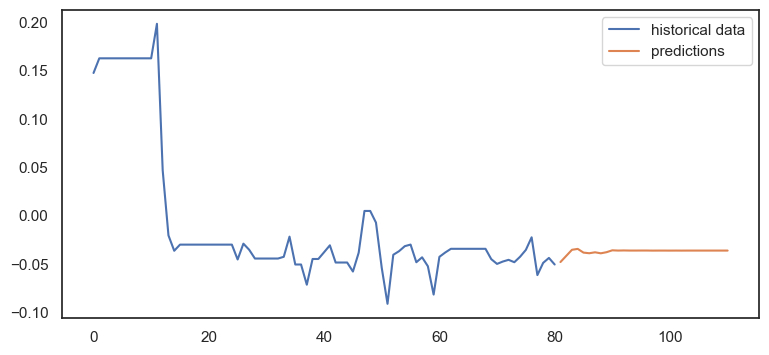

In [176]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
ts_df['vader_scores'].plot(ax=ax, label='historical data')
predictions.plot(ax=ax, label='predictions')
ax.legend();

#### 3-Month Forecast

In [178]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=ts_df['vader_scores'])

In [179]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=90)

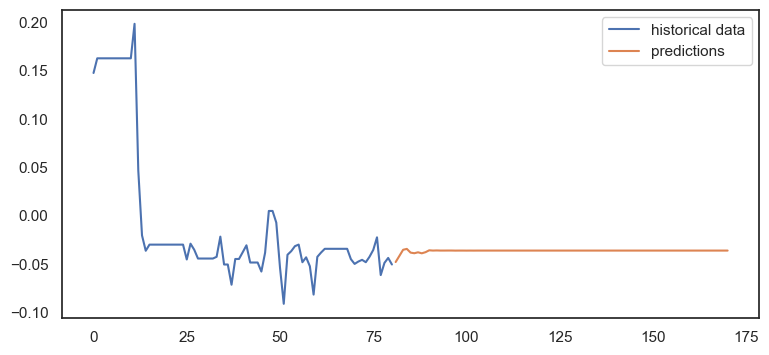

In [180]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
ts_df['vader_scores'].plot(ax=ax, label='historical data')
predictions.plot(ax=ax, label='predictions')
ax.legend();

### ARIMA

In [204]:
ts_df

,date,polarity_scores,subjectivity_scores,vader_scores
0,2009-04-06,0.094961,0.409290,0.147343
1,2009-04-07,0.099100,0.401130,0.162493
2,2009-04-08,0.099100,0.401130,0.162493
3,2009-04-09,0.099100,0.401130,0.162493
4,2009-04-10,0.099100,0.401130,0.162493
...,...,...,...,...
76,2009-06-21,-0.000478,0.400266,-0.022298
77,2009-06-22,-0.024853,0.407731,-0.061300
78,2009-06-23,-0.020091,0.405474,-0.048686
79,2009-06-24,-0.015868,0.398273,-0.043578


In [205]:
# Split data into train-test

data_train = ts_df[0:int(len(ts_df)*.8)]
data_test  = ts_df[int(len(ts_df)*.8):]

### VADER

In [440]:
y_train = data_train['vader_scores']
y_test = data_test['vader_scores']

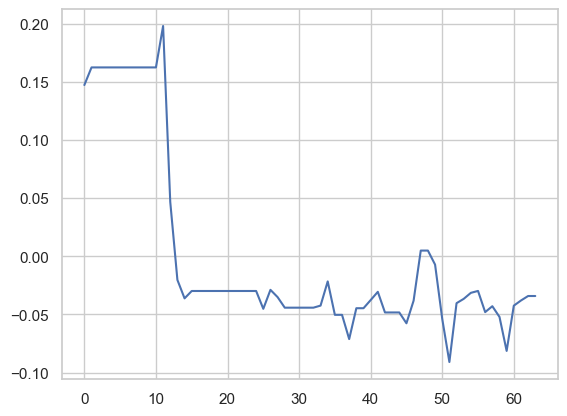

In [441]:
plt.plot(y_train)
plt.show()

In [442]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import statsmodels.tsa as tsa

In [443]:
Titles = ["Dickey-Fuller Test Statistic", 
          "p-value", 
          "Number of lags used", 
          "Number of observations", 
          "Critical values", 
          "Maximised information criterion"]

# Performing a Dickey-Fuller Test for stationarity on the series

Test_of_Stationarity = sm.tsa.stattools.adfuller(y_train, regression = "n")

# Viewing the results of the Dickey-Fuller Test

for i in range(len(Titles)):
    print(Titles[i], Test_of_Stationarity[i])

Dickey-Fuller Test Statistic -2.213909380177784
p-value 0.02578527740987117
Number of lags used 1
Number of observations 62
Critical values {'1%': -2.602744838709677, '5%': -1.9460766397569735, '10%': -1.6131357396529151}
Maximised information criterion -238.31789792561483


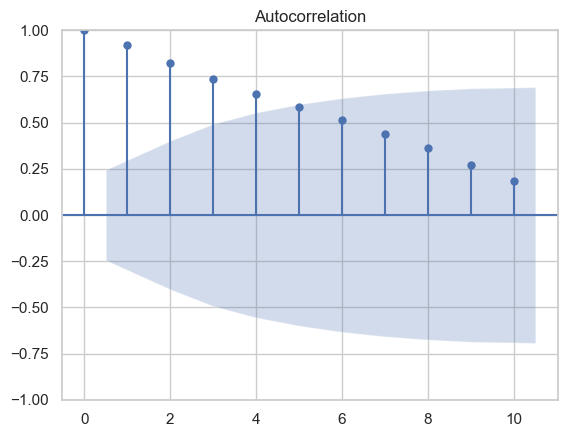

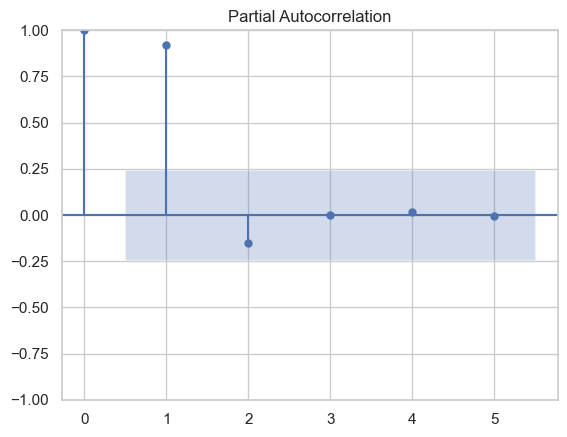

In [444]:
plot_acf(y_train, lags = 10)
plt.show()

plot_pacf(y_train, lags = 5)
plt.show()

In [445]:
#pip install --upgrade statsmodels

In [446]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [447]:
ARIMA_train = SARIMAX(y_train, order = (2, 0, 0)) 
ARIMA_train = ARIMA_train.fit()

C:\Users\benmc\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [448]:
y_pred = ARIMA_train.get_forecast(len(y_test)) 

In [452]:
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMA_train.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1]) 
y_pred_df.index = y_test.index

In [453]:
y_pred_df

,lower vader_scores,upper vader_scores,Predictions
64,-0.083172,0.018590,-0.032291
65,-0.105353,0.044839,-0.030257
66,-0.120121,0.063495,-0.028313
67,-0.130827,0.077852,-0.026487
68,-0.138972,0.089415,-0.024779
69,-0.145349,0.098988,-0.023180
70,-0.150428,0.107058,-0.021685
71,-0.154519,0.113947,-0.020286
72,-0.157836,0.119882,-0.018977
73,-0.160538,0.125032,-0.017753


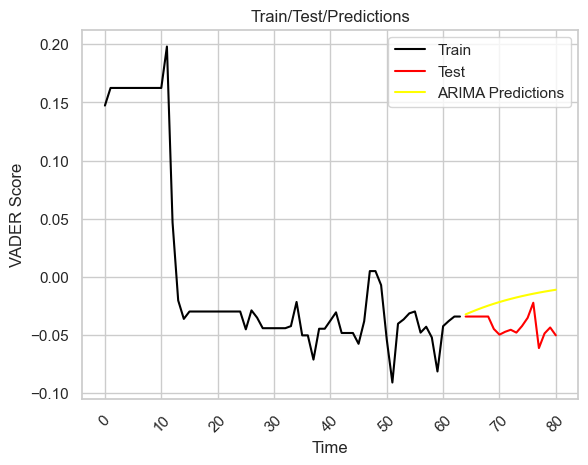

In [454]:
plt.plot(y_train, color = "black", label="Train") 
plt.plot(y_test, color = "red", label="Test")
plt.plot(y_pred_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('VADER Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("Train/Test/Predictions") 
plt.show()

### Forecast

#### 1-Week Forecast

In [455]:
y = ts_df['vader_scores']
y

0     0.147343
1     0.162493
2     0.162493
3     0.162493
4     0.162493
        ...   
76   -0.022298
77   -0.061300
78   -0.048686
79   -0.043578
80   -0.050353
Name: vader_scores, Length: 81, dtype: float64

In [456]:
ARIMA_train = SARIMAX(y, order = (2, 0, 0)) 
ARIMA_train = ARIMA_train.fit()

In [457]:
y_pred = ARIMA_train.get_forecast(7)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMA_train.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1]) 
#y_pred_df.index = y_test.index

In [458]:
y_pred_df

,lower vader_scores,upper vader_scores,Predictions
81,-0.095111,-0.002204,-0.048657
82,-0.113977,0.021846,-0.046066
83,-0.126347,0.039352,-0.043498
84,-0.135283,0.053165,-0.041059
85,-0.142067,0.064557,-0.038755
86,-0.147364,0.074203,-0.036581
87,-0.151566,0.082511,-0.034528


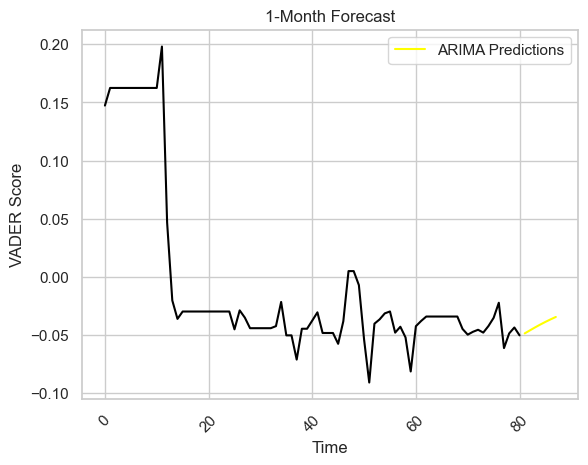

In [459]:
plt.plot(y, color = "black") 
plt.plot(y_pred_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('VADER Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("1-Month Forecast") 
plt.show()

#### 1-Month Forecast

In [460]:
y = ts_df['vader_scores']
y

0     0.147343
1     0.162493
2     0.162493
3     0.162493
4     0.162493
        ...   
76   -0.022298
77   -0.061300
78   -0.048686
79   -0.043578
80   -0.050353
Name: vader_scores, Length: 81, dtype: float64

In [461]:
ARIMA_train = SARIMAX(y, order = (2, 0, 0)) 
ARIMA_train = ARIMA_train.fit()

In [462]:
y_pred = ARIMA_train.get_forecast(30)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMA_train.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1]) 
#y_pred_df.index = y_test.index

In [463]:
y_pred_df

,lower vader_scores,upper vader_scores,Predictions
81,-0.095111,-0.002204,-0.048657
82,-0.113977,0.021846,-0.046066
83,-0.126347,0.039352,-0.043498
84,-0.135283,0.053165,-0.041059
85,-0.142067,0.064557,-0.038755
86,-0.147364,0.074203,-0.036581
87,-0.151566,0.082511,-0.034528
88,-0.154933,0.089752,-0.032590
89,-0.157643,0.096119,-0.030762
90,-0.159828,0.101757,-0.029036


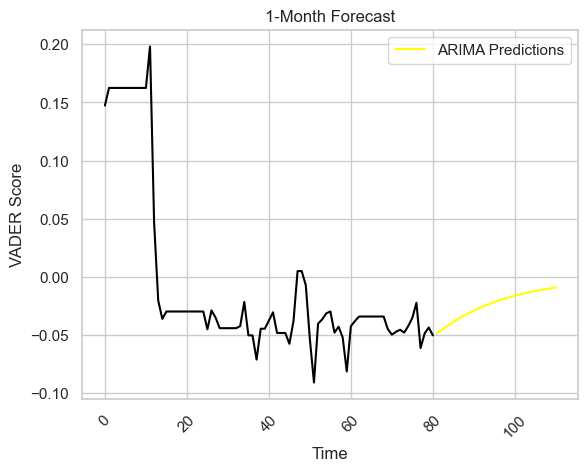

In [464]:
plt.plot(y, color = "black") 
plt.plot(y_pred_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('VADER Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("1-Month Forecast") 
plt.show()

#### 3-Month Forecast

In [465]:
y = ts_df['vader_scores']
y

0     0.147343
1     0.162493
2     0.162493
3     0.162493
4     0.162493
        ...   
76   -0.022298
77   -0.061300
78   -0.048686
79   -0.043578
80   -0.050353
Name: vader_scores, Length: 81, dtype: float64

In [466]:
ARIMA_train = SARIMAX(y, order = (2, 0, 0)) 
ARIMA_train = ARIMA_train.fit()

In [467]:
y_pred = ARIMA_train.get_forecast(90)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMA_train.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1]) 
#y_pred_df.index = y_test.index

In [468]:
y_pred_df

,lower vader_scores,upper vader_scores,Predictions
81,-0.095111,-0.002204,-0.048657
82,-0.113977,0.021846,-0.046066
83,-0.126347,0.039352,-0.043498
84,-0.135283,0.053165,-0.041059
85,-0.142067,0.064557,-0.038755
...,...,...,...
166,-0.159535,0.158814,-0.000360
167,-0.159515,0.158835,-0.000340
168,-0.159497,0.158854,-0.000321
169,-0.159479,0.158873,-0.000303


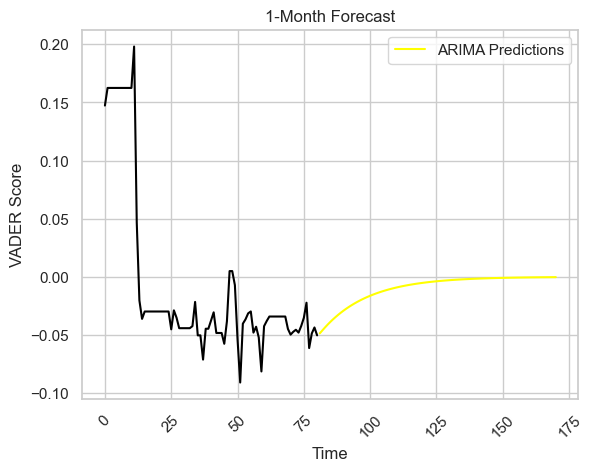

In [469]:
plt.plot(y, color = "black") 
plt.plot(y_pred_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('VADER Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("1-Month Forecast") 
plt.show()

### Subjectivity

In [399]:
y_train = data_train['subjectivity_scores']
y_test = data_test['subjectivity_scores']

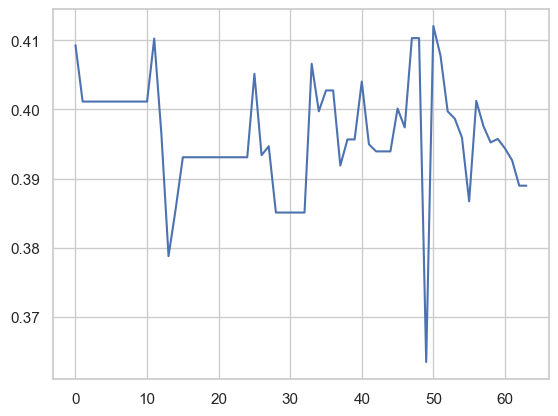

In [400]:
plt.plot(y_train)
plt.show()

In [401]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import statsmodels.tsa as tsa

In [402]:
Titles = ["Dickey-Fuller Test Statistic", 
          "p-value", 
          "Number of lags used", 
          "Number of observations", 
          "Critical values", 
          "Maximised information criterion"]

# Performing a Dickey-Fuller Test for stationarity on the series

Test_of_Stationarity = sm.tsa.stattools.adfuller(y_train, regression = "n")

# Viewing the results of the Dickey-Fuller Test

for i in range(len(Titles)):
    print(Titles[i], Test_of_Stationarity[i])

Dickey-Fuller Test Statistic -0.5270122252021637
p-value 0.4849889665804382
Number of lags used 5
Number of observations 58
Critical values {'1%': -2.6053664565992865, '5%': -1.9464713057115914, '10%': -1.6129174701709788}
Maximised information criterion -330.44009535079715


In [403]:
y_train = data_train['subjectivity_scores'].diff()
y_test = data_test['subjectivity_scores'].diff()
y_train = y_train[1:]
y_test = y_test[1:]

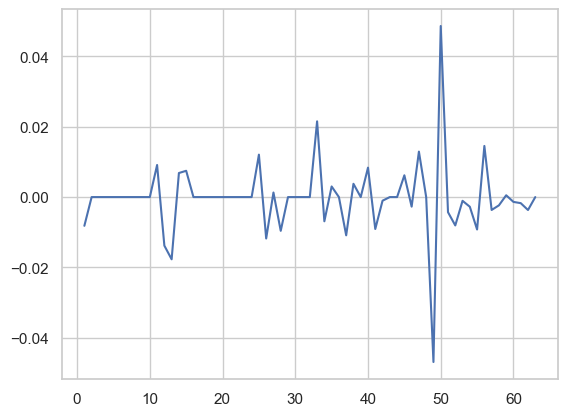

In [404]:
plt.plot(y_train)
plt.show()

In [405]:
Titles = ["Dickey-Fuller Test Statistic", 
          "p-value", 
          "Number of lags used", 
          "Number of observations", 
          "Critical values", 
          "Maximised information criterion"]

# Performing a Dickey-Fuller Test for stationarity on the series

Test_of_Stationarity = sm.tsa.stattools.adfuller(y_train, regression = "n")

# Viewing the results of the Dickey-Fuller Test

for i in range(len(Titles)):
    print(Titles[i], Test_of_Stationarity[i])

Dickey-Fuller Test Statistic -5.903505020755745
p-value 1.5086634180995298e-08
Number of lags used 4
Number of observations 58
Critical values {'1%': -2.6053664565992865, '5%': -1.9464713057115914, '10%': -1.6129174701709788}
Maximised information criterion -325.0332953114288


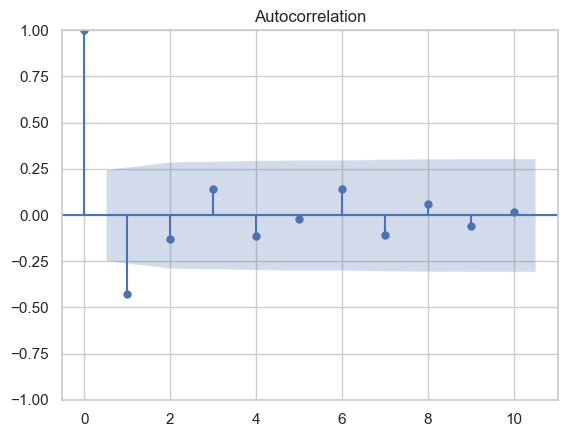

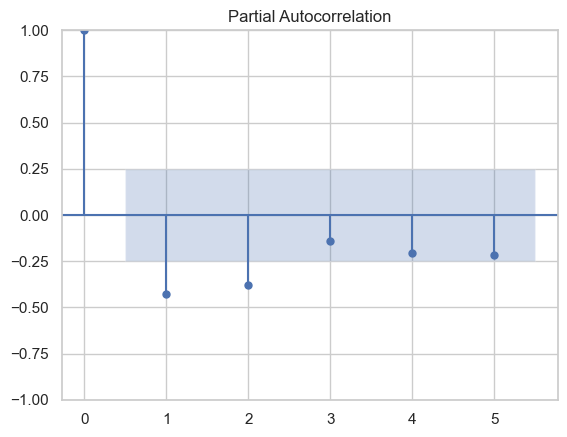

In [406]:
plot_acf(y_train, lags = 10)
plt.show()

plot_pacf(y_train, lags = 5)
plt.show()

In [327]:
#pip install --upgrade statsmodels

In [328]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [417]:
ARIMA_train = SARIMAX(y_train, order = (3, 0, 1)) 
ARIMA_train = ARIMA_train.fit()

C:\Users\benmc\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [418]:
y_pred = ARIMA_train.get_forecast(len(y_test)) 

In [419]:
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMA_train.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1]) 
y_pred_df.index = y_test.index

In [420]:
y_pred_df

,lower subjectivity_scores,upper subjectivity_scores,Predictions
65,-0.010455,0.021492,NaN
66,-0.020183,0.021038,4.278455e-04
67,-0.020668,0.020792,6.227399e-05
68,-0.020047,0.021574,7.632193e-04
69,-0.020675,0.021049,1.868841e-04
70,-0.020831,0.020908,3.863074e-05
71,-0.020760,0.020980,1.103849e-04
72,-0.020827,0.020915,4.404451e-05
73,-0.020859,0.020884,1.249853e-05
74,-0.020854,0.020888,1.709916e-05


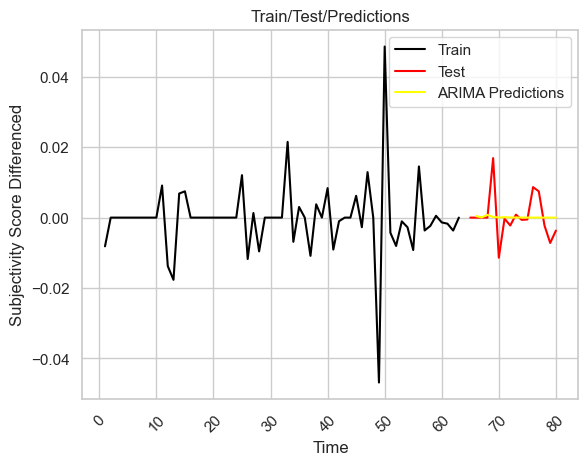

In [421]:
plt.plot(y_train, color = "black", label="Train") 
plt.plot(y_test, color = "red", label="Test")
plt.plot(y_pred_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('Subjectivity Score Differenced')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("Train/Test/Predictions") 
plt.show()

### Forecast

#### 1-Week Forecast

In [422]:
y = ts_df['subjectivity_scores']
y = y.diff()
y = y[1:]

In [423]:
ARIMA_train = SARIMAX(y, order = (3, 0, 1)) 
ARIMA_train = ARIMA_train.fit()

In [425]:
y_pred = ARIMA_train.get_forecast(7)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMA_train.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1]) 
#y_pred_df.index = y_test.index

In [426]:
y_pred_df

,lower subjectivity_scores,upper subjectivity_scores,Predictions
81,-0.012852,0.017338,NaN
82,-0.019545,0.018716,-0.000415
83,-0.019731,0.018783,-0.000474
84,-0.019136,0.019439,0.000151
85,-0.019345,0.019299,-0.000023
86,-0.019384,0.019271,-0.000057
87,-0.019323,0.019333,0.000005


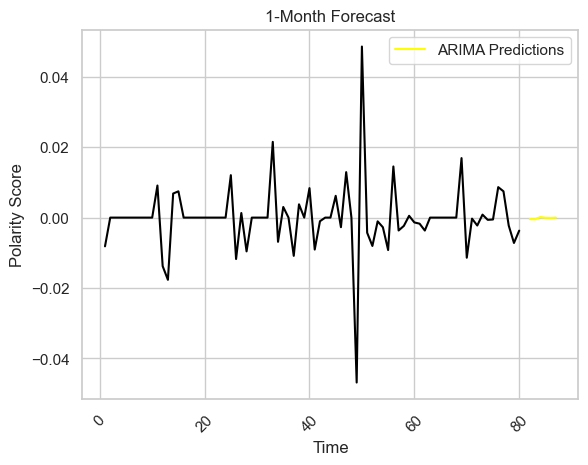

In [427]:
plt.plot(y, color = "black") 
plt.plot(y_pred_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('Polarity Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("1-Month Forecast") 
plt.show()

#### 1-Month Forecast

In [428]:
y = ts_df['subjectivity_scores']
y = y.diff()
y = y[1:]

In [429]:
ARIMA_train = SARIMAX(y, order = (3, 0, 1)) 
ARIMA_train = ARIMA_train.fit()

In [431]:
y_pred = ARIMA_train.get_forecast(30)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMA_train.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1]) 
#y_pred_df.index = y_test.index

In [432]:
y_pred_df

,lower subjectivity_scores,upper subjectivity_scores,Predictions
81,-0.012852,0.017338,NaN
82,-0.019545,0.018716,-4.145703e-04
83,-0.019731,0.018783,-4.737793e-04
84,-0.019136,0.019439,1.514524e-04
85,-0.019345,0.019299,-2.329543e-05
86,-0.019384,0.019271,-5.657919e-05
87,-0.019323,0.019333,5.196314e-06
88,-0.019331,0.019326,-2.462445e-06
89,-0.019335,0.019322,-6.890979e-06
90,-0.019329,0.019328,-8.743224e-07


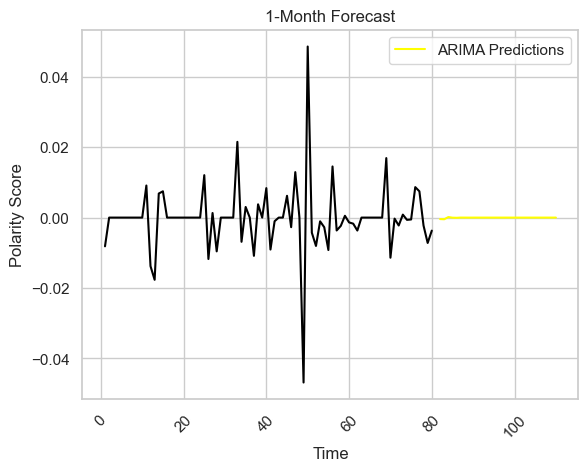

In [433]:
plt.plot(y, color = "black") 
plt.plot(y_pred_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('Polarity Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("1-Month Forecast") 
plt.show()

#### 3-Month Forecast

In [434]:
y = ts_df['subjectivity_scores']
y = y.diff()
y = y[1:]

In [436]:
ARIMA_train = SARIMAX(y, order = (3,0,1))
ARIMA_train = ARIMA_train.fit()

In [437]:
y_pred = ARIMA_train.get_forecast(90)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMA_train.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1]) 
#y_pred_df.index = y_test.index

In [438]:
y_pred_df

,lower subjectivity_scores,upper subjectivity_scores,Predictions
81,-0.012852,0.017338,NaN
82,-0.019545,0.018716,-4.145703e-04
83,-0.019731,0.018783,-4.737793e-04
84,-0.019136,0.019439,1.514524e-04
85,-0.019345,0.019299,-2.329543e-05
...,...,...,...
166,-0.019328,0.019328,-1.265513e-24
167,-0.019328,0.019328,-7.304220e-25
168,-0.019328,0.019328,-4.215809e-25
169,-0.019328,0.019328,-2.433258e-25


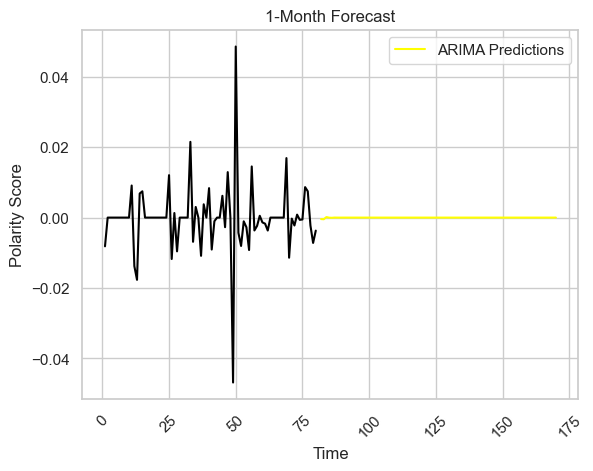

In [439]:
plt.plot(y, color = "black") 
plt.plot(y_pred_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('Polarity Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("1-Month Forecast") 
plt.show()

### Polarity

In [321]:
y_train = data_train['polarity_scores']
y_test = data_test['polarity_scores']

In [322]:
y_train = y_train[1:]
y_test = y_test[1:]

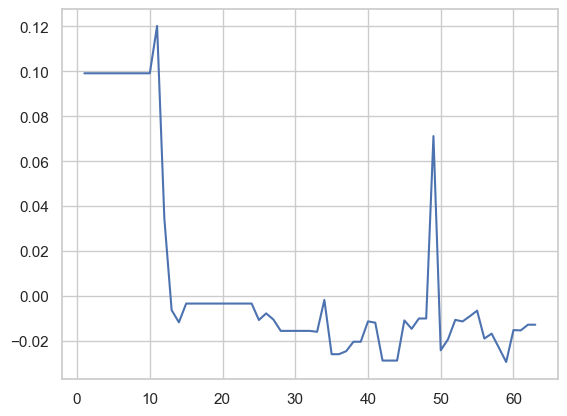

In [323]:
plt.plot(y_train)
plt.show()

In [324]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import statsmodels.tsa as tsa

In [325]:
Titles = ["Dickey-Fuller Test Statistic", 
          "p-value", 
          "Number of lags used", 
          "Number of observations", 
          "Critical values", 
          "Maximised information criterion"]

# Performing a Dickey-Fuller Test for stationarity on the series

Test_of_Stationarity = sm.tsa.stattools.adfuller(y_train, regression = "n")

# Viewing the results of the Dickey-Fuller Test

for i in range(len(Titles)):
    print(Titles[i], Test_of_Stationarity[i])

Dickey-Fuller Test Statistic -2.5408490661724126
p-value 0.010699445093285229
Number of lags used 0
Number of observations 62
Critical values {'1%': -2.602744838709677, '5%': -1.9460766397569735, '10%': -1.6131357396529151}
Maximised information criterion -272.4431978550246


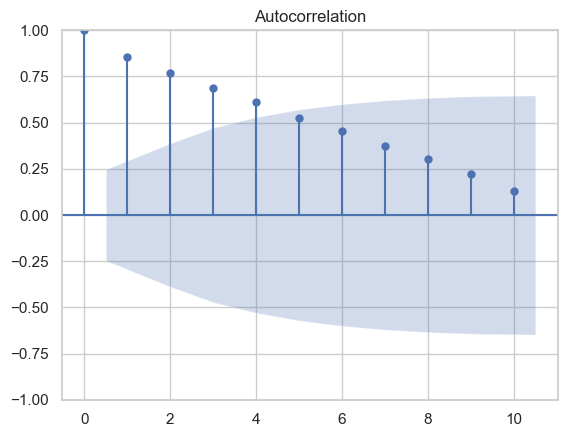

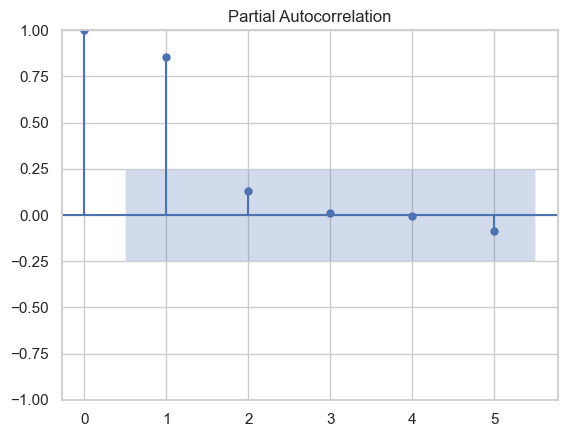

In [326]:
plot_acf(y_train, lags = 10)
plt.show()

plot_pacf(y_train, lags = 5)
plt.show()

In [327]:
#pip install --upgrade statsmodels

In [328]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [329]:
ARIMA_train = SARIMAX(y_train, order = (2, 0, 0)) 
ARIMA_train = ARIMA_train.fit()

In [330]:
y_pred = ARIMA_train.get_forecast(len(y_test)) 

In [331]:
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMA_train.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1]) 
y_pred_df.index = y_test.index

In [332]:
y_pred_df

,lower polarity_scores,upper polarity_scores,Predictions
65,-0.051344,0.027609,NaN
66,-0.060068,0.037520,-0.011274
67,-0.067478,0.046135,-0.010672
68,-0.073062,0.052842,-0.010110
69,-0.077606,0.058454,-0.009576
70,-0.081347,0.063206,-0.009071
71,-0.084477,0.067294,-0.008592
72,-0.087121,0.070845,-0.008138
73,-0.089371,0.073954,-0.007709
74,-0.091296,0.076692,-0.007302


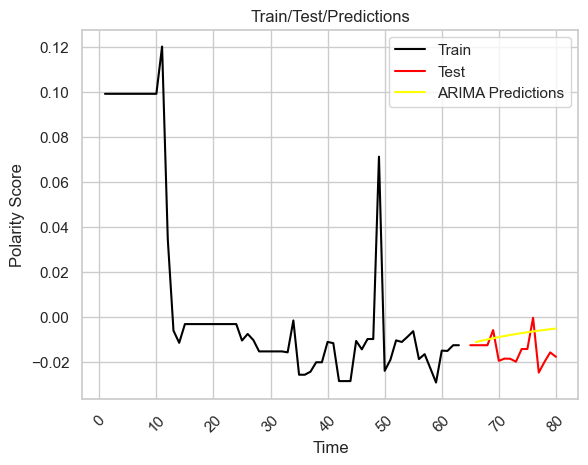

In [333]:
plt.plot(y_train, color = "black", label="Train") 
plt.plot(y_test, color = "red", label="Test")
plt.plot(y_pred_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('Polarity Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("Train/Test/Predictions") 
plt.show()

### Forecast

#### 1-Week Forecast

In [346]:
y = ts_df['polarity_scores']
y

0     0.094961
1     0.099100
2     0.099100
3     0.099100
4     0.099100
        ...   
76   -0.000478
77   -0.024853
78   -0.020091
79   -0.015868
80   -0.017837
Name: polarity_scores, Length: 81, dtype: float64

In [347]:
ARIMA_train = SARIMAX(y, order = (1, 0, 0)) 
ARIMA_train = ARIMA_train.fit()

In [348]:
y_pred_df

,lower polarity_scores,upper polarity_scores,Predictions
81,-0.052632,0.019994,-0.016319
82,-0.064147,0.034287,-0.014930
83,-0.071504,0.044186,-0.013659
84,-0.076677,0.051685,-0.012496
85,-0.080471,0.057607,-0.011432
86,-0.083315,0.062397,-0.010459
87,-0.085472,0.066335,-0.009569
88,-0.087118,0.069609,-0.008754
89,-0.088373,0.072356,-0.008009
90,-0.089329,0.074675,-0.007327


In [349]:
y_pred = ARIMA_train.get_forecast(7)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMA_train.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1]) 
#y_pred_df.index = y_test.index

In [350]:
y_pred_df

,lower polarity_scores,upper polarity_scores,Predictions
81,-0.052632,0.019994,-0.016319
82,-0.064147,0.034287,-0.014930
83,-0.071504,0.044186,-0.013659
84,-0.076677,0.051685,-0.012496
85,-0.080471,0.057607,-0.011432
86,-0.083315,0.062397,-0.010459
87,-0.085472,0.066335,-0.009569


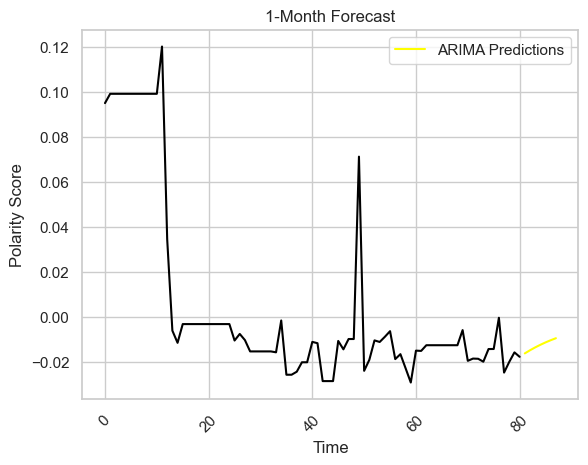

In [351]:
plt.plot(y, color = "black") 
plt.plot(y_pred_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('Polarity Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("1-Month Forecast") 
plt.show()

#### 1-Month Forecast

In [352]:
y = ts_df['polarity_scores']
y

0     0.094961
1     0.099100
2     0.099100
3     0.099100
4     0.099100
        ...   
76   -0.000478
77   -0.024853
78   -0.020091
79   -0.015868
80   -0.017837
Name: polarity_scores, Length: 81, dtype: float64

In [353]:
ARIMA_train = SARIMAX(y, order = (1, 0, 0)) 
ARIMA_train = ARIMA_train.fit()

In [354]:
y_pred_df

,lower polarity_scores,upper polarity_scores,Predictions
81,-0.052632,0.019994,-0.016319
82,-0.064147,0.034287,-0.014930
83,-0.071504,0.044186,-0.013659
84,-0.076677,0.051685,-0.012496
85,-0.080471,0.057607,-0.011432
86,-0.083315,0.062397,-0.010459
87,-0.085472,0.066335,-0.009569


In [355]:
y_pred = ARIMA_train.get_forecast(30)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMA_train.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1]) 
#y_pred_df.index = y_test.index

In [356]:
y_pred_df

,lower polarity_scores,upper polarity_scores,Predictions
81,-0.052632,0.019994,-0.016319
82,-0.064147,0.034287,-0.014930
83,-0.071504,0.044186,-0.013659
84,-0.076677,0.051685,-0.012496
85,-0.080471,0.057607,-0.011432
86,-0.083315,0.062397,-0.010459
87,-0.085472,0.066335,-0.009569
88,-0.087118,0.069609,-0.008754
89,-0.088373,0.072356,-0.008009
90,-0.089329,0.074675,-0.007327


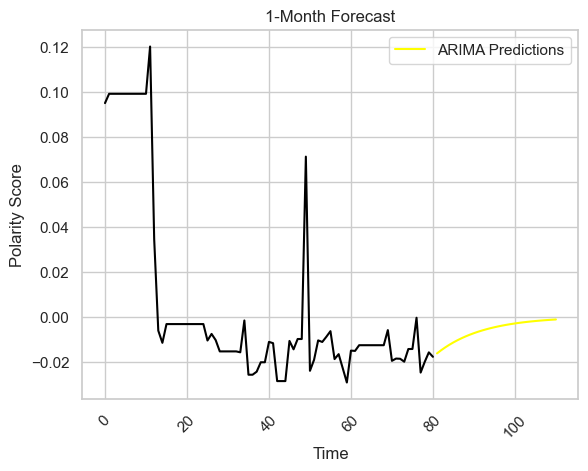

In [357]:
plt.plot(y, color = "black") 
plt.plot(y_pred_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('Polarity Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("1-Month Forecast") 
plt.show()

#### 3-Month Forecast

In [358]:
y = ts_df['polarity_scores']
y

0     0.094961
1     0.099100
2     0.099100
3     0.099100
4     0.099100
        ...   
76   -0.000478
77   -0.024853
78   -0.020091
79   -0.015868
80   -0.017837
Name: polarity_scores, Length: 81, dtype: float64

In [359]:
ARIMA_train = SARIMAX(y, order = (1, 0, 0)) 
ARIMA_train = ARIMA_train.fit()

In [360]:
y_pred_df

,lower polarity_scores,upper polarity_scores,Predictions
81,-0.052632,0.019994,-0.016319
82,-0.064147,0.034287,-0.014930
83,-0.071504,0.044186,-0.013659
84,-0.076677,0.051685,-0.012496
85,-0.080471,0.057607,-0.011432
86,-0.083315,0.062397,-0.010459
87,-0.085472,0.066335,-0.009569
88,-0.087118,0.069609,-0.008754
89,-0.088373,0.072356,-0.008009
90,-0.089329,0.074675,-0.007327


In [361]:
y_pred = ARIMA_train.get_forecast(90)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMA_train.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1]) 
#y_pred_df.index = y_test.index

In [362]:
y_pred_df

,lower polarity_scores,upper polarity_scores,Predictions
81,-0.052632,0.019994,-0.016319
82,-0.064147,0.034287,-0.014930
83,-0.071504,0.044186,-0.013659
84,-0.076677,0.051685,-0.012496
85,-0.080471,0.057607,-0.011432
...,...,...,...
166,-0.089948,0.089931,-0.000008
167,-0.089947,0.089932,-0.000008
168,-0.089947,0.089933,-0.000007
169,-0.089946,0.089933,-0.000006


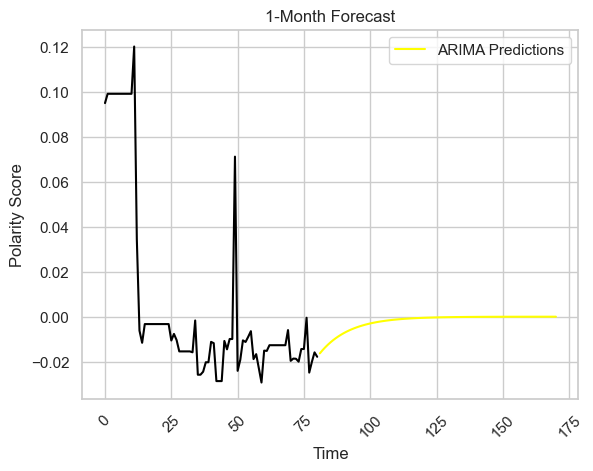

In [363]:
plt.plot(y, color = "black") 
plt.plot(y_pred_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('Polarity Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("1-Month Forecast") 
plt.show()